In [23]:
import torch
import torch.nn as nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.nn.functional import cross_entropy
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [20]:
import sys
import os

# Get the parent directory of the notebook
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.append(parent_dir)

import utils

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

test_data = MNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=1000)

train_data = MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=1000)

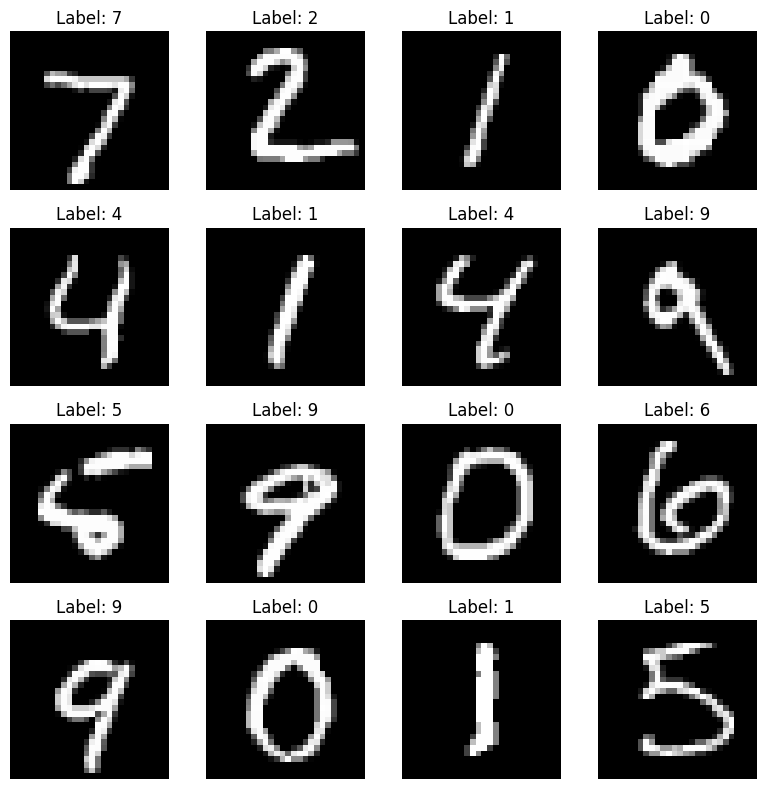

In [22]:
utils.show_samples(test_data)

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [19]:
for epoch in range(10):
    model = Net()
    optimizer = Adam(model.parameters(), lr=0.001)
    for x, y in train_loader:
        x = x.view(-1, 28*28)
        y_pred = model(x)
        loss = cross_entropy(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    correct = 0
    total = 0
    for x, y in test_loader:
        x = x.view(-1, 28*28)
        y_pred = model(x)
        _, predicted = torch.max(y_pred, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
    print('Epoch', epoch, 'Accuracy', correct/total)

Epoch 0 Accuracy 0.7954
Epoch 1 Accuracy 0.813
Epoch 2 Accuracy 0.8149
Epoch 3 Accuracy 0.7402
Epoch 4 Accuracy 0.714
Epoch 5 Accuracy 0.8076
Epoch 6 Accuracy 0.6701
Epoch 7 Accuracy 0.7467
Epoch 8 Accuracy 0.7933
Epoch 9 Accuracy 0.8063


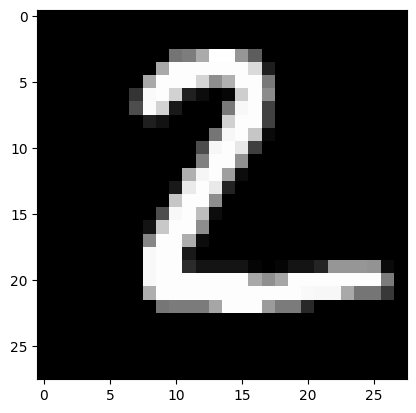

In [28]:
test_image = test_data[1][0].view(-1, 28*28)
plt.imshow(test_image.view(28, 28).numpy(), cmap='gray')

In [29]:
prediction = model(test_image)
print('Prediction tensor:', prediction)
_, prediction = torch.max(prediction, 1)
print('Prediction:', prediction.item())

Prediction tensor: tensor([[1.1933e-02, 6.3965e-04, 9.5095e-01, 5.1184e-03, 2.9441e-06, 2.7283e-06,
         2.6152e-02, 1.8793e-06, 5.1961e-03, 3.2444e-06]],
       grad_fn=<SoftmaxBackward0>)
Prediction: 2
